# Table of Contents
   
1. Introduction
2. Import and Merge Data 
3. Data Exploratory Analysis and Visualization
3. Feature Engineering
4. Machine Learning
5. Closing

# Introduction
Use the real estate datasets from Zillow Kaggle competition to do data exploration and analyses
The feature/predictor datasets are related with different aspect of some real estate sold in 2016 and 2017
The response datasets are the log error difference between zestimate and real sold prices
Because I started this project when the submission deadline for this stage of the Kaggle competition already reached, I will not be able to attend the competition, yet this project is still a good practice

# Import and Merge Data

In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import mean_squared_error, accuracy_score
import scipy.stats as stats

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")  
import matplotlib as mpl

from IPython.display import display

### Import 2016 and 2017 Date and Log Error Datasets

In [2]:
#read 2016 property file
train2016_df = pd.read_csv("../Data/train_2016_v2.csv")
train2017_df = pd.read_csv("../Data/train_2017.csv")
display(train2016_df.columns)
display(train2017_df.columns)

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')

In [3]:
display(train2016_df.shape)
display(train2017_df.shape)

(90275, 3)

(77613, 3)

In [4]:
display(train2016_df.dtypes)
display(train2017_df.dtypes)

parcelid             int64
logerror           float64
transactiondate     object
dtype: object

parcelid             int64
logerror           float64
transactiondate     object
dtype: object

In [5]:
display(train2016_df.head())
display(train2017_df.head())

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


### Update Date Time Format

In [6]:
train2016_df["TransDate"] = pd.to_datetime(train2016_df.transactiondate)
train2016_df['YearMonth'] = train2016_df['TransDate'].map(lambda x: 100*x.year + x.month)
train2016_df["TransYear"] = train2016_df["TransDate"].dt.year
train2016_df["TransMonth"] = train2016_df["TransDate"].dt.month
train2016_df.drop('transactiondate', axis=1, inplace=True)
display(train2016_df.head(10))

,parcelid,logerror,TransDate,YearMonth,TransYear,TransMonth
0,11016594,0.0276,2016-01-01,201601,2016,1
1,14366692,-0.1684,2016-01-01,201601,2016,1
2,12098116,-0.0040,2016-01-01,201601,2016,1
3,12643413,0.0218,2016-01-02,201601,2016,1
4,14432541,-0.0050,2016-01-02,201601,2016,1
5,11509835,-0.2705,2016-01-02,201601,2016,1
6,12286022,0.0440,2016-01-02,201601,2016,1
7,17177301,0.1638,2016-01-02,201601,2016,1
8,14739064,-0.0030,2016-01-02,201601,2016,1
9,14677559,0.0843,2016-01-03,201601,2016,1


In [7]:
train2017_df["TransDate"] = pd.to_datetime(train2017_df.transactiondate)
train2017_df['YearMonth'] = train2017_df['TransDate'].map(lambda x: 100*x.year + x.month)
train2017_df["TransYear"] = train2017_df["TransDate"].dt.year
train2017_df["TransMonth"] = train2017_df["TransDate"].dt.month
train2017_df.drop('transactiondate', axis=1, inplace=True)
display(train2017_df.head(10))

,parcelid,logerror,TransDate,YearMonth,TransYear,TransMonth
0,14297519,0.025595,2017-01-01,201701,2017,1
1,17052889,0.055619,2017-01-01,201701,2017,1
2,14186244,0.005383,2017-01-01,201701,2017,1
3,12177905,-0.103410,2017-01-01,201701,2017,1
4,10887214,0.006940,2017-01-01,201701,2017,1
5,17143294,-0.020526,2017-01-01,201701,2017,1
6,12095076,-0.001011,2017-01-01,201701,2017,1
7,12069064,0.101723,2017-01-01,201701,2017,1
8,12790562,-0.040966,2017-01-02,201701,2017,1
9,11542646,-0.036763,2017-01-02,201701,2017,1


### Import 2016 and 2017 Feature Datasets

In [8]:
data2016_df = pd.read_csv("../Data/properties_2016.csv")
data2016_df.head(5)

/Users/wenhuizhang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [9]:
data2017_df = pd.read_csv("../Data/properties_2017.csv")
data2017_df.head(5)

/Users/wenhuizhang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [10]:
display(data2016_df.shape)
display(data2017_df.shape)

(2985217, 58)

(2985217, 58)

In [11]:
problem_df = data2016_df.iloc[:,[22,32,34,49,55]]
problem_df.head(20)

,hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag
0,NaN,010D,NaN,NaN,NaN
1,NaN,0109,LCA11*,NaN,NaN
2,NaN,1200,LAC2,NaN,NaN
3,NaN,1200,LAC2,NaN,NaN
4,NaN,1210,LAM1,NaN,NaN
5,NaN,1210,LAC4,NaN,NaN
6,NaN,010V,LAC2,NaN,NaN
7,NaN,1210,BUC4YY,NaN,NaN
8,NaN,010D,BUR1*,NaN,NaN
9,NaN,1210,SFC2*,NaN,NaN


It seems that the four columns of data that caused warning not only have mixed data types, but also have either some data that I couldn't translate or have too many NaN data, therefore I will just drop these data

In [12]:
data2016_df.drop(data2016_df.columns[[22,32,34,49,55]], axis=1, inplace=True)

In [13]:
data2017_df.drop(data2017_df.columns[[22,32,34,49,55]], axis=1, inplace=True)

In [14]:
display(data2016_df.shape)
display(data2017_df.shape)

(2985217, 53)

(2985217, 53)

### Merge Dataframes Together

In [15]:
full2016_df = pd.merge(train2016_df, data2016_df, how = 'inner', on = ['parcelid'])
full2017_df = pd.merge(train2017_df, data2017_df, how = 'inner', on = ['parcelid'])
display(full2016_df.shape)
display(full2017_df.shape)

(90275, 58)

(77613, 58)

In [91]:
full_df = full2016_df.append(full2017_df)
full_df = full_df.set_index([list(range(0,167888))])
display(full_df.shape)
display(full_df.tail(5))

(167888, 58)

,parcelid,logerror,TransDate,YearMonth,TransYear,TransMonth,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
167883,10833991,-0.002245,2017-09-20,201709,2017,9,1.0,NaN,NaN,3.0,...,NaN,1980.0,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,201709,2017,9,NaN,NaN,NaN,2.0,...,NaN,1940.0,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,201709,2017,9,NaN,NaN,NaN,2.0,...,NaN,1964.0,1.0,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,201709,2017,9,1.0,NaN,NaN,1.0,...,NaN,1954.0,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,6.037434e+13
167887,12826780,0.007204,2017-09-25,201709,2017,9,NaN,NaN,NaN,2.0,...,NaN,1955.0,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,6.037503e+13


# Data Exploratory Analysis and Visualization

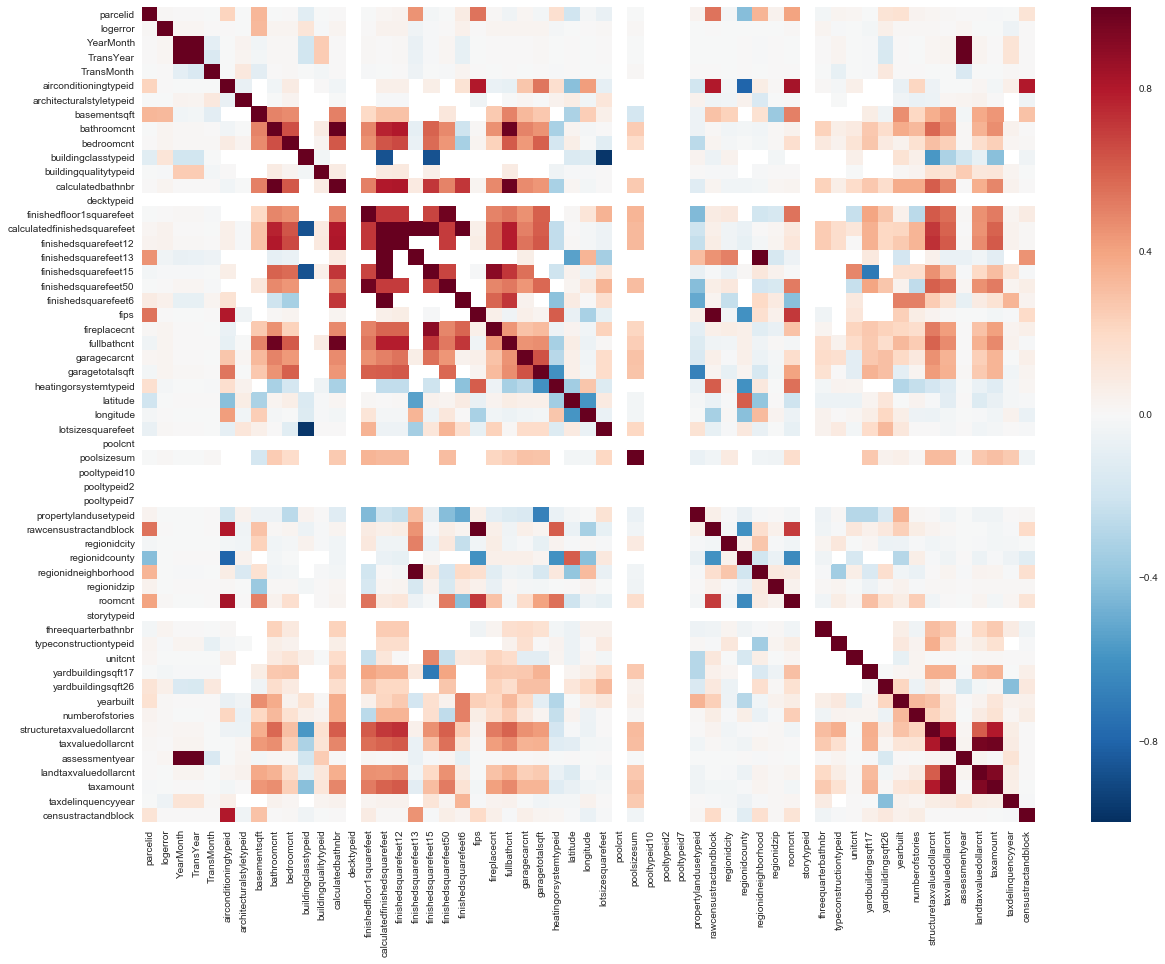

In [92]:
plt.subplots(figsize=(20,15))
sns.heatmap(full_df.corr())
#print (full2016_df.corr())

In [93]:
data_correlations = full_df.corr()
data_correlations

,parcelid,logerror,YearMonth,TransYear,TransMonth,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
parcelid,1.000000,0.010730,0.003750,0.003827,-0.001910,0.219463,-0.004090,0.333675,-0.004533,0.005916,...,0.135001,0.151773,0.036149,0.021046,0.008992,0.003904,0.002893,-0.011739,-0.001710,0.138023
logerror,0.010730,1.000000,0.016247,0.015940,0.003796,0.007077,-0.006321,0.324681,0.027038,0.028513,...,0.054912,0.011364,0.010421,0.015546,0.005332,0.016091,-0.000759,-0.002186,-0.051464,0.004132
YearMonth,0.003750,0.016247,1.000000,0.998608,-0.096420,-0.000814,0.034884,-0.035005,0.009806,0.009755,...,-0.155881,0.001954,-0.005938,0.020933,0.026779,0.998608,0.025354,0.000525,0.140539,0.002646
TransYear,0.003827,0.015940,0.998608,1.000000,-0.148776,-0.000732,0.028627,-0.029068,0.009476,0.009265,...,-0.160919,0.001649,-0.005908,0.020891,0.026861,1.000000,0.025526,0.000828,0.137482,0.002443
TransMonth,-0.001910,0.003796,-0.096420,-0.148776,1.000000,-0.001452,0.108238,-0.103407,0.005026,0.008051,...,0.105827,0.005511,0.000142,-0.001813,-0.004829,-0.148777,-0.006358,-0.005792,0.013662,0.003494
airconditioningtypeid,0.219463,0.007077,-0.000814,-0.000732,-0.001452,1.000000,-0.072481,NaN,-0.038259,0.081462,...,NaN,-0.074144,0.218243,-0.052042,-0.006697,-0.000732,0.017672,-0.030491,0.058229,0.798905
architecturalstyletypeid,-0.004090,-0.006321,0.034884,0.028627,0.108238,-0.072481,1.000000,NaN,-0.004275,0.038688,...,NaN,-0.045413,-0.063303,-0.060524,0.019315,0.028627,0.041904,0.007468,NaN,-0.045996
basementsqft,0.333675,0.324681,-0.035005,-0.029068,-0.103407,NaN,NaN,1.000000,0.499681,0.475785,...,-0.042162,0.468386,0.209089,0.360513,0.431774,-0.029068,0.375131,0.439060,NaN,0.291311
bathroomcnt,-0.004533,0.027038,0.009806,0.009476,0.005026,-0.038259,-0.004275,0.499681,1.000000,0.641287,...,0.172747,0.370455,0.325685,0.575903,0.467015,0.009476,0.348649,0.463079,0.046787,0.002181
bedroomcnt,0.005916,0.028513,0.009755,0.009265,0.008051,0.081462,0.038688,0.475785,0.641287,1.000000,...,0.088452,0.044116,0.156218,0.300683,0.239532,0.009265,0.175243,0.242179,0.019267,0.008216


According to the correlation values, select a few key features for data fitting, model building and predictions

### Analyze Null Values

In [94]:
null_No = full_df.isnull().sum()

In [95]:
full_df.shape[0]

167888

In [96]:
null_ratio = null_No/full_df.shape[0]

In [97]:
nullRatio = pd.DataFrame(null_ratio,columns=["Null Ratio"])

In [98]:
nullRatio.sort_values("Null Ratio",ascending=False,inplace=True)

In [137]:
nullRatio.head(10)

,Null Ratio
buildingclasstypeid,0.999815
finishedsquarefeet13,0.999553
storytypeid,0.999446
basementsqft,0.999446
yardbuildingsqft26,0.999017
architecturalstyletypeid,0.997212
typeconstructiontypeid,0.996891
finishedsquarefeet6,0.995193
decktypeid,0.992424
pooltypeid10,0.990315


In [99]:
col_name = list(nullRatio.index)

In [100]:
y_pos = np.arange(len(col_name))

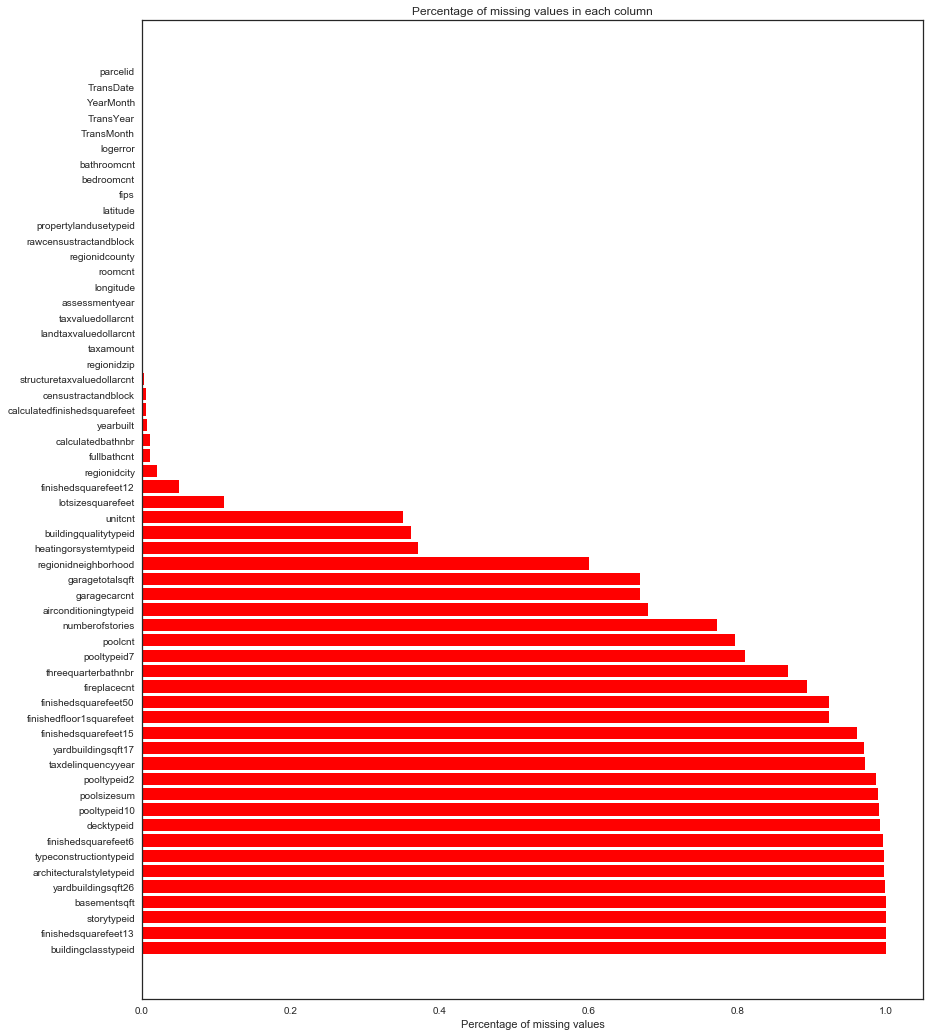

In [101]:
fig, ax = plt.subplots(figsize=(14,18))
plt.barh(y_pos, nullRatio['Null Ratio'], align='center', color='red')
plt.yticks(y_pos, col_name);
ax.set_xlabel("Percentage of missing values")
ax.set_title("Percentage of missing values in each column")

### Predictors Comparisons

A few predictors have similar names. Plot them out and see their relationships

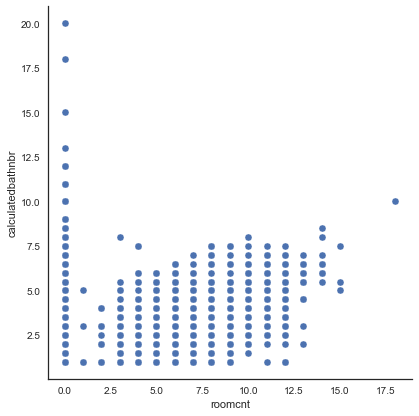

In [102]:
sns.pairplot(full_df, x_vars=["roomcnt"], y_vars=['calculatedbathnbr'], size=6)

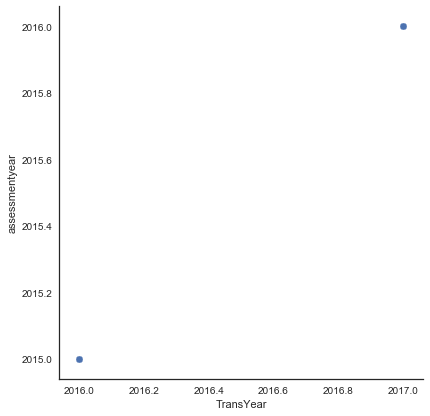

In [103]:
sns.pairplot(full_df, x_vars=["TransYear"], y_vars=['assessmentyear'], size=6)

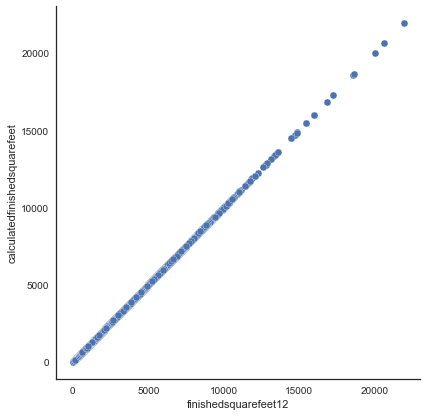

In [104]:
sns.pairplot(full_df, x_vars=["finishedsquarefeet12"], y_vars=['calculatedfinishedsquarefeet'], size=6)

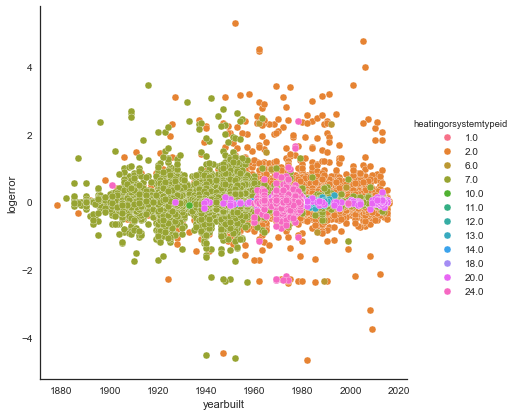

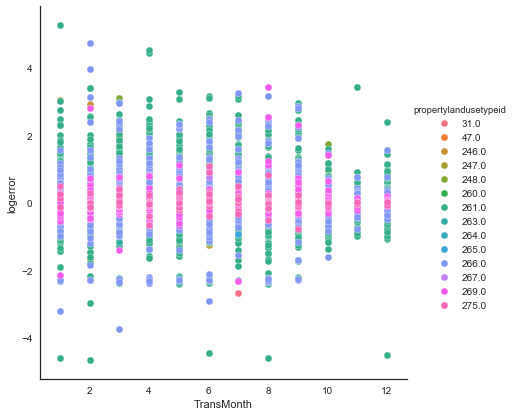

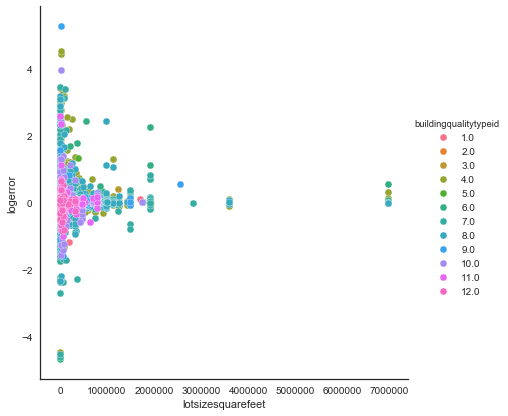

In [105]:
#plot of logerror change with both quantitative and qualitative variables 
sns.pairplot(full_df, x_vars=["yearbuilt"], y_vars=["logerror"], hue='heatingorsystemtypeid', size=6, palette='husl')
sns.pairplot(full_df, x_vars=["TransMonth"], y_vars=["logerror"], hue='propertylandusetypeid', size=6, palette='husl')
sns.pairplot(full_df, x_vars=['lotsizesquarefeet'], y_vars=['logerror'], hue='buildingqualitytypeid', size=6, palette='husl')

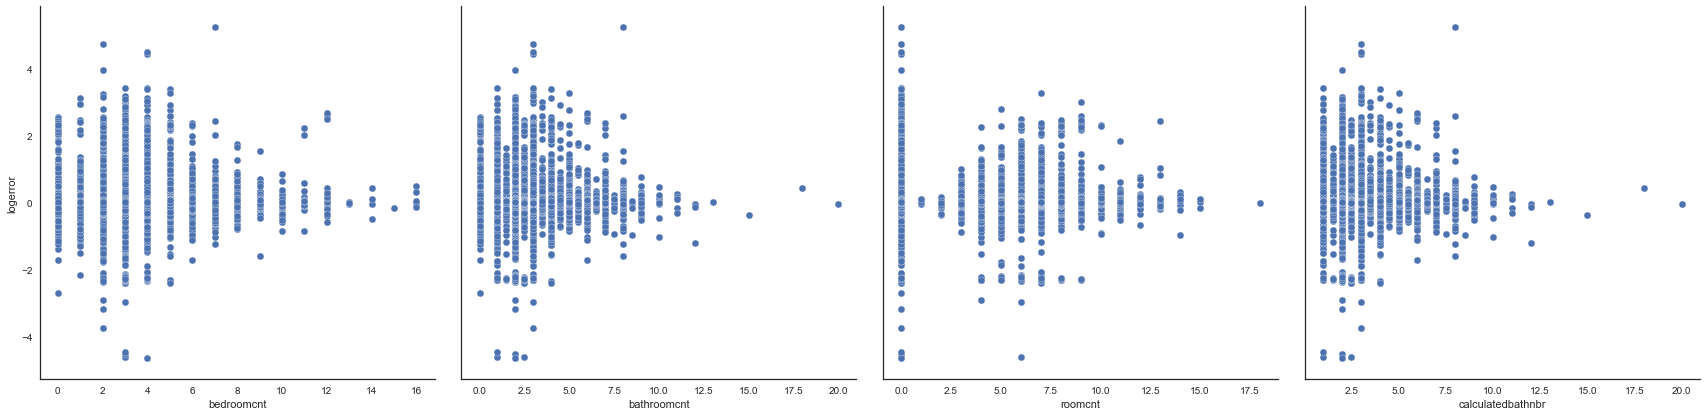

In [106]:
#different room count impact on log error
sns.pairplot(full_df, x_vars=["bedroomcnt","bathroomcnt","roomcnt","calculatedbathnbr"], y_vars=["logerror"], size=6)

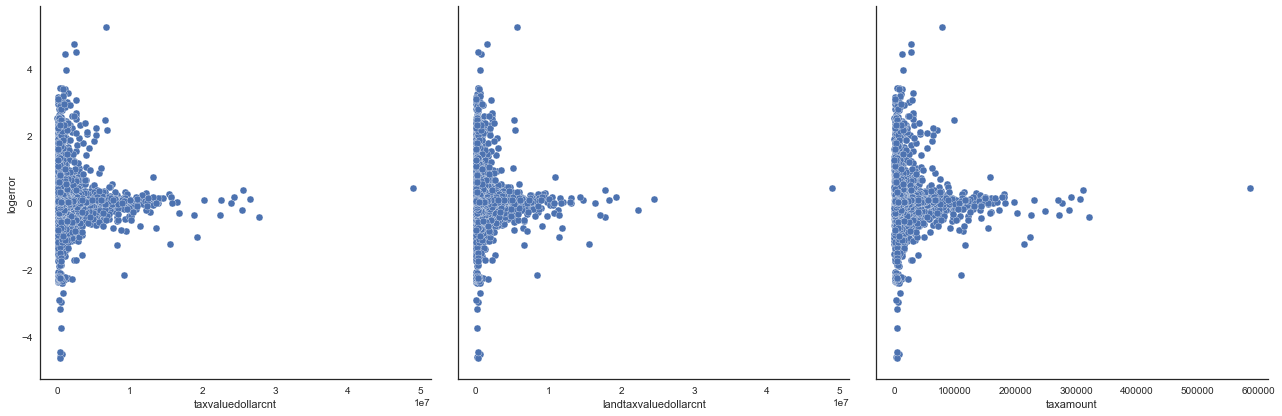

In [107]:
#Tax value impact on log error
sns.pairplot(full_df, x_vars=["taxvaluedollarcnt","landtaxvaluedollarcnt","taxamount"], y_vars=["logerror"], size=6)

AttributeError: 'DataFrame' object has no attribute 'scalederror'

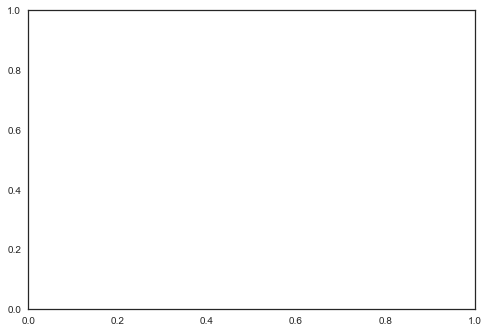

In [108]:
# Need more time to work on the location features
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(full2016_df.latitude, full2016_df.longitude, c=full2016_df.scalederror, s=10, cmap=cmap)
f.colorbar(points)

Based on the analyses above, key features are selected and divided into three groups: numeric features, catgorical features and location related features

In [109]:
num_names = ['TransYear','TransMonth','yearbuilt','calculatedfinishedsquarefeet','lotsizesquarefeet','calculatedbathnbr']
cat_names = ['propertylandusetypeid','buildingqualitytypeid','heatingorsystemtypeid']
loc_names = ['latitude','longitude','regionidzip']

In [139]:
full_df.regionidzip.nunique()

390

In [140]:
full_df.regionidzip.describe()

count    167769.000000
mean      96586.390722
std        3723.009458
min       95982.000000
25%       96193.000000
50%       96389.000000
75%       96987.000000
max      399675.000000
Name: regionidzip, dtype: float64

# Feature Engineering

### Fill in Null Values
null values are filled in differently according to their different types

#### Fill in numeric columns according to their median values

In [110]:
#show the numer of missing values per column
num_col = full_df[num_names]
print("\nNumber of missing values per column")
print(num_col.isnull().sum())


Number of missing values per column
TransYear                           0
TransMonth                          0
yearbuilt                        1060
calculatedfinishedsquarefeet      896
lotsizesquarefeet               18442
calculatedbathnbr                1832
dtype: int64


In [111]:
#find the median value for each column
median_per_column = full_df[num_names].apply(lambda x: x.median(),axis=0)
print ("Median value per column:\n",median_per_column)

Median value per column:
 TransYear                       2016.0
TransMonth                         6.0
yearbuilt                       1970.0
calculatedfinishedsquarefeet    1541.0
lotsizesquarefeet               7200.0
calculatedbathnbr                  2.0
dtype: float64


In [112]:
#fill in with median values
num_df = full_df[num_names].fillna(median_per_column,axis=0)
print("numer of missing values after filling in")
display(num_df.isnull().sum())
display(num_df.tail(10))

numer of missing values after filling in


TransYear                       0
TransMonth                      0
yearbuilt                       0
calculatedfinishedsquarefeet    0
lotsizesquarefeet               0
calculatedbathnbr               0
dtype: int64

,TransYear,TransMonth,yearbuilt,calculatedfinishedsquarefeet,lotsizesquarefeet,calculatedbathnbr
167878,2017,9,1967.0,2068.0,7333.0,3.0
167879,2017,9,2006.0,2200.0,7503.0,3.0
167880,2017,9,1971.0,1261.0,57110.0,2.0
167881,2017,9,1958.0,1570.0,7499.0,2.0
167882,2017,9,1962.0,1633.0,4630.0,2.0
167883,2017,9,1980.0,1741.0,59487.0,3.0
167884,2017,9,1940.0,1286.0,47405.0,2.0
167885,2017,9,1964.0,1612.0,12105.0,2.0
167886,2017,9,1954.0,1032.0,5074.0,1.0
167887,2017,9,1955.0,1762.0,6347.0,2.0


#### Fill in categorical columns using their most frequent values

In [113]:
#show the numer of missing values per column
cat_col = full_df[cat_names]
print("\nNumber of missing values per column")
print(cat_col.isnull().sum())


Number of missing values per column
propertylandusetypeid       34
buildingqualitytypeid    60715
heatingorsystemtypeid    62237
dtype: int64


In [114]:
#find the most frequent number for each column
def get_most_frequent_value(my_column):
    return my_column.value_counts().index[0]

most_frequent_values_per_column = full_df[cat_names].apply(get_most_frequent_value,axis=0)
print ("Most frequent value in each column:\n",most_frequent_values_per_column)

Most frequent value in each column:
 propertylandusetypeid    261.0
buildingqualitytypeid      7.0
heatingorsystemtypeid      2.0
dtype: float64


In [115]:
#fill in with most frequent values
cat_df = full_df[cat_names].fillna(most_frequent_values_per_column,axis=0)
cat_df = cat_df.astype(int) 
print("numer of missing values after filling in")
display(cat_df.isnull().sum())
display(cat_df.tail(10))
cat_df.shape

numer of missing values after filling in


propertylandusetypeid    0
buildingqualitytypeid    0
heatingorsystemtypeid    0
dtype: int64

,propertylandusetypeid,buildingqualitytypeid,heatingorsystemtypeid
167878,261,8,2
167879,266,10,2
167880,266,8,2
167881,261,6,2
167882,261,6,2
167883,266,8,2
167884,261,6,2
167885,261,7,2
167886,261,4,2
167887,261,6,2


(167888, 3)

#### Fill in location columns with 0 to replace NaN

In [116]:
#show the numer of missing values per column
loc_col = full_df[loc_names]
print("\nNumber of missing values per column")
print(loc_col.isnull().sum())


Number of missing values per column
latitude        34
longitude       34
regionidzip    119
dtype: int64


In [117]:
#fill in with 0
loc_df = full_df[loc_names].fillna(0,axis=0)
print("numer of missing values after filling in")
display(loc_df.isnull().sum())
display(loc_df.head(10))

numer of missing values after filling in


latitude       0
longitude      0
regionidzip    0
dtype: int64

,latitude,longitude,regionidzip
0,34280990.0,-118488536.0,96370.0
1,33668120.0,-117677556.0,96962.0
2,34136312.0,-118175032.0,96293.0
3,33755800.0,-118309000.0,96222.0
4,33485643.0,-117700234.0,96961.0
5,33870089.0,-118402768.0,96109.0
6,33899475.0,-118212720.0,96091.0
7,34207204.0,-119165589.0,97101.0
8,33549600.0,-117678000.0,96987.0
9,33612700.0,-117742000.0,96963.0


### Transform categorical features

#### Property land use type ID

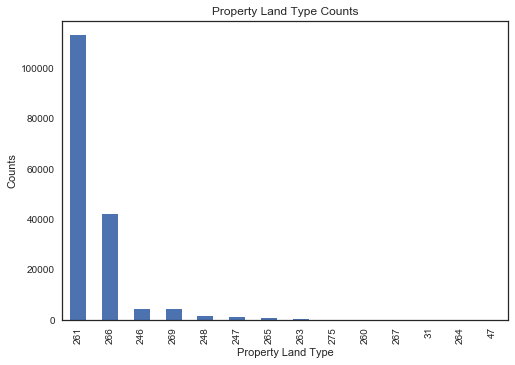

In [118]:
#First look at its distribution
LandType = cat_df.propertylandusetypeid.value_counts()
LandType.plot(kind='bar', title="Property Land Type Counts")
plt.ylabel("Counts")
plt.xlabel("Property Land Type");

form four variables for the property land type according to the above types:
1. SFR: Single Family Residential (261)
2. CON: Condominium (266)
3. DUP: Duplex (2 Units, Any Combination) (246)
4. PUD: Planned Unit Development (269)

In [119]:
#generate these new feature columns
col = ['SFR','CON','DUP','PUD']
typ = [261,266,246,269]
for a in range(4):
    cat_df[col[a]] = cat_df.propertylandusetypeid == typ[a]
    cat_df[col[a]] = cat_df[col[a]].astype(int)
cat_df.head(10)

,propertylandusetypeid,buildingqualitytypeid,heatingorsystemtypeid,SFR,CON,DUP,PUD
0,261,4,2,1,0,0,0
1,261,7,2,1,0,0,0
2,261,4,2,1,0,0,0
3,266,4,2,0,1,0,0
4,261,7,2,1,0,0,0
5,261,1,2,1,0,0,0
6,261,7,7,1,0,0,0
7,266,7,2,0,1,0,0
8,266,7,2,0,1,0,0
9,266,7,2,0,1,0,0


#### Building quality type ID

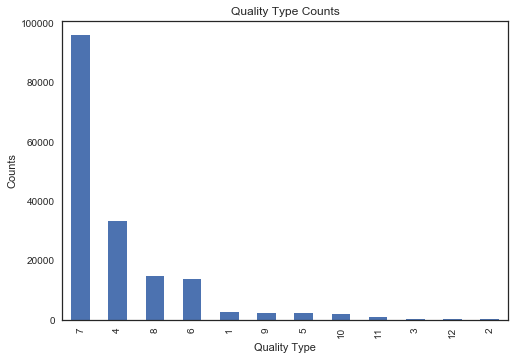

In [120]:
QualityType = cat_df.buildingqualitytypeid.value_counts()
QualityType.plot(kind='bar', title="Quality Type Counts")
plt.ylabel("Counts")
plt.xlabel("Quality Type");

Form four variables for the quality type according to their distributions:
1. Q7: 7
2. Q4: 4
3. Q1: 1
4. Q10: 10

In [121]:
#generate these new feature columns
col = ['Q7','Q4','Q1','Q10']
typ = [7,4,1,10]
for a in range(4):
    cat_df[col[a]] = cat_df.buildingqualitytypeid == typ[a]
    cat_df[col[a]] = cat_df[col[a]].astype(int)
cat_df.head(10)

,propertylandusetypeid,buildingqualitytypeid,heatingorsystemtypeid,SFR,CON,DUP,PUD,Q7,Q4,Q1,Q10
0,261,4,2,1,0,0,0,0,1,0,0
1,261,7,2,1,0,0,0,1,0,0,0
2,261,4,2,1,0,0,0,0,1,0,0
3,266,4,2,0,1,0,0,0,1,0,0
4,261,7,2,1,0,0,0,1,0,0,0
5,261,1,2,1,0,0,0,0,0,1,0
6,261,7,7,1,0,0,0,1,0,0,0
7,266,7,2,0,1,0,0,1,0,0,0
8,266,7,2,0,1,0,0,1,0,0,0
9,266,7,2,0,1,0,0,1,0,0,0


#### Heating system type ID

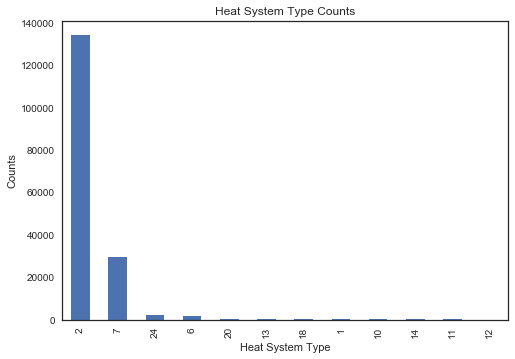

In [122]:
HeatType = cat_df.heatingorsystemtypeid.value_counts()
HeatType.plot(kind='bar', title="Heat System Type Counts")
plt.ylabel("Counts")
plt.xlabel("Heat System Type");

In [123]:
#generate these new feature columns
col = ['Central','FW','Yes','FAir']
typ = [2,7,24,6]
for a in range(4):
    cat_df[col[a]] = cat_df.heatingorsystemtypeid == typ[a]
    cat_df[col[a]] = cat_df[col[a]].astype(int)
cat_df.tail(10)

,propertylandusetypeid,buildingqualitytypeid,heatingorsystemtypeid,SFR,CON,DUP,PUD,Q7,Q4,Q1,Q10,Central,FW,Yes,FAir
167878,261,8,2,1,0,0,0,0,0,0,0,1,0,0,0
167879,266,10,2,0,1,0,0,0,0,0,1,1,0,0,0
167880,266,8,2,0,1,0,0,0,0,0,0,1,0,0,0
167881,261,6,2,1,0,0,0,0,0,0,0,1,0,0,0
167882,261,6,2,1,0,0,0,0,0,0,0,1,0,0,0
167883,266,8,2,0,1,0,0,0,0,0,0,1,0,0,0
167884,261,6,2,1,0,0,0,0,0,0,0,1,0,0,0
167885,261,7,2,1,0,0,0,1,0,0,0,1,0,0,0
167886,261,4,2,1,0,0,0,0,1,0,0,1,0,0,0
167887,261,6,2,1,0,0,0,0,0,0,0,1,0,0,0


In [124]:
newCat_df = cat_df.iloc[:,3:]
display(newCat_df.tail(5))
newCat_df.shape

,SFR,CON,DUP,PUD,Q7,Q4,Q1,Q10,Central,FW,Yes,FAir
167883,0,1,0,0,0,0,0,0,1,0,0,0
167884,1,0,0,0,0,0,0,0,1,0,0,0
167885,1,0,0,0,1,0,0,0,1,0,0,0
167886,1,0,0,0,0,1,0,0,1,0,0,0
167887,1,0,0,0,0,0,0,0,1,0,0,0


(167888, 12)

### Scale numeric features

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #create a scaler object
scaler.fit(num_df) #fit the scaler
num_scaled = scaler.transform(num_df) #transform the data with it
newNum_df = pd.DataFrame(num_scaled,columns=num_names)
display(newNum_df.tail(5))
newNum_df.shape

,TransYear,TransMonth,yearbuilt,calculatedfinishedsquarefeet,lotsizesquarefeet,calculatedbathnbr
167883,1.078491,1.330448,0.481881,-0.038765,0.280155,0.710042
167884,1.078491,1.330448,-1.205724,-0.523840,0.175772,-0.317711
167885,1.078491,1.330448,-0.193161,-0.176292,-0.129202,-0.317711
167886,1.078491,1.330448,-0.615062,-0.794629,-0.189947,-1.345463
167887,1.078491,1.330448,-0.572872,-0.016377,-0.178949,-0.317711


(167888, 6)

Action Item: Analyze and minimize skew

#### Feature columns after engineering

In [127]:
feat_df = pd.concat((newNum_df,newCat_df),axis=1)
display(feat_df.head(5))
feat_df.shape

,TransYear,TransMonth,yearbuilt,calculatedfinishedsquarefeet,lotsizesquarefeet,calculatedbathnbr,SFR,CON,DUP,PUD,Q7,Q4,Q1,Q10,Central,FW,Yes,FAir
0,-0.927221,-1.697974,-0.404112,-0.099533,-0.168745,-0.317711,1,0,0,0,0,1,0,0,1,0,0,0
1,-0.927221,-1.697974,1.916346,0.517737,-0.202310,1.223918,1,0,0,0,1,0,0,0,1,0,0,0
2,-0.927221,-1.697974,-1.205724,0.468697,-0.135095,0.710042,1,0,0,0,0,1,0,0,1,0,0,0
3,-0.927221,-1.697974,0.777212,-1.000386,0.378403,-0.317711,0,1,0,0,0,1,0,0,1,0,0,0
4,-0.927221,-1.697974,0.524071,0.539059,-0.181947,0.196165,1,0,0,0,1,0,0,0,1,0,0,0


(167888, 18)

In [128]:
#name response column
loger_df = full_df['logerror']
display(loger_df.head(5))
loger_df.shape

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64

(167888,)

# Machine Learning

### Use two methods to fit data individually and then use the relative more accurate one for data prediction
1. Method One: Regression -- interpretable fitting results
2. Method Two: Random Forrest -- more flexible, possibly more accurate fitting

### Fitting Data Using Linear Regression

#### Train Test Data Split

In [129]:
X_train,X_test,y_train,y_test = train_test_split(feat_df, loger_df, test_size=0.4, random_state=1234)

#### Linear Regression Model

In [130]:
#train on training set
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#generate predictions on training set and evaluate
y_pred_train = linreg.predict(X_train)
print( "Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

#generate predictions on test set and evaluate
y_pred_test = linreg.predict(X_test)
print( "Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Training set RMSE: 0.167163673184
Test set RMSE: 0.163033587815


#### Regression Model with Second Order Interaction Only

In [134]:
#generate the interactions of numeric features
from sklearn.preprocessing import PolynomialFeatures
poly_fit_2 = PolynomialFeatures(degree=2,interaction_only=True)
X_train_ = poly_fit_2.fit_transform(X_train)
X_test_ = poly_fit_2.fit_transform(X_test)
X_train.shape

(100732, 18)

In [135]:
#train on training set
linreg = LinearRegression()
linreg.fit(X_train_, y_train)

#generate predictions on training set and evaluate
y_pred_train_ = linreg.predict(X_train_)
print( "Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_)))

#generate predictions on test set and evaluate
y_pred_test_ = linreg.predict(X_test_)
print( "Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_)))

Training set RMSE: 0.166869865122
Test set RMSE: 0.163112834179
